# ===========================
# ***Heart Disease Prediction***
# ===========================

#**Cell 1 — Import Required Libraries**

In [4]:
# Core Python data libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Saving Models
import joblib

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Cell 2 — Load Dataset**

In [6]:
# Load heart disease dataset
# Ensure the heart.csv file is in the same folder as the notebook
df = pd.read_csv("/content/heart.csv")

# Display dataset shape and first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#**Cell 3 — Dataset Info & Summary**

In [7]:
# Display structure and datatype info
df.info()

# Summary statistics for numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#**Cell 4 — Missing Value Check**

In [8]:
# Check for missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#**Cell 5 — Target Distribution**

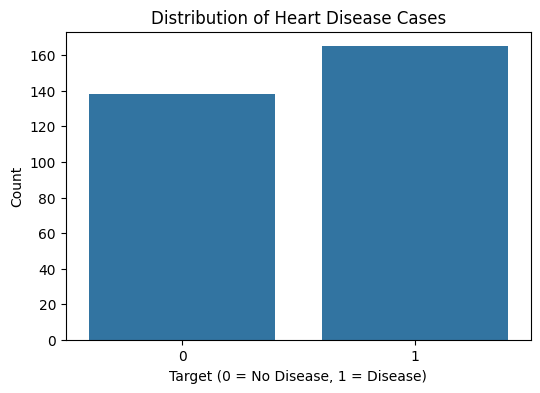

In [9]:
# Understand the balance of the target classes (0 = No Disease, 1 = Disease)
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease Cases")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

#**Cell 6 — Numeric Feature Distribution**

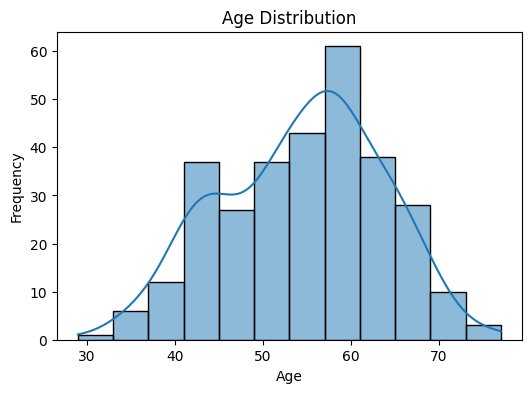

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#**Cell 7 — Correlation Heatmap**

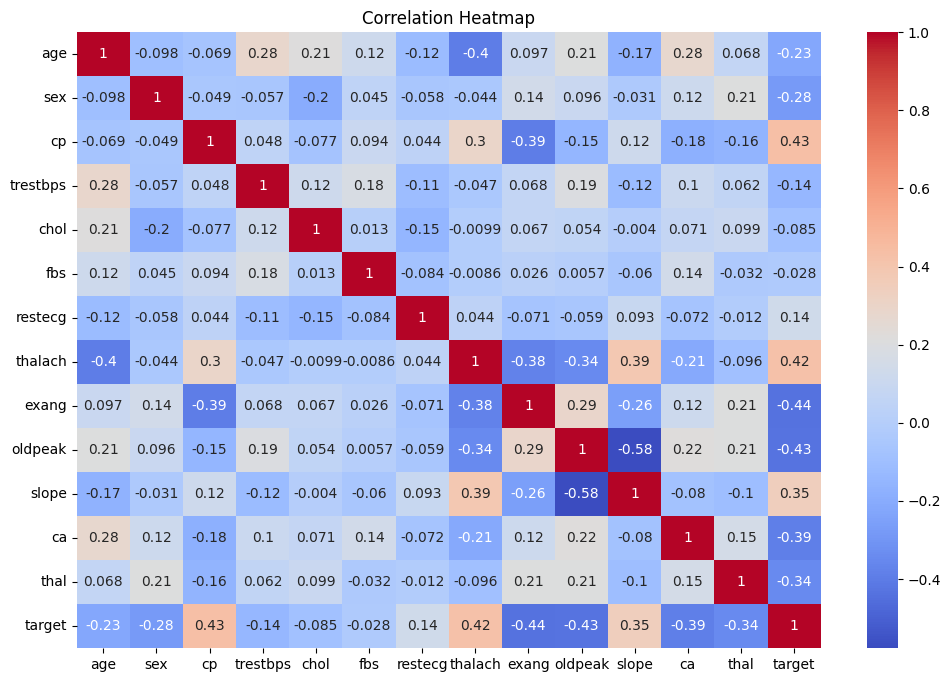

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#**Cell 8 — Train–Test Split**

In [12]:
# Split features (X) and label (y)
X = df.drop("target", axis=1)
y = df["target"]

# Use stratify to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (242, 13)
Testing Data: (61, 13)


#**Cell 9 — Preprocessing Pipelines**

In [13]:
# Numerical columns for scaling
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Categorical columns for encoding
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Pipeline for numeric data: impute missing values + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline for categorical data: impute + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combining both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#**Cell 10 — Build Model Pipelines**

In [14]:
# Logistic Regression Pipeline
pipe_lr = Pipeline([
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

# Decision Tree Pipeline
pipe_dt = Pipeline([
    ("preprocess", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42))
])

# Random Forest Pipeline
pipe_rf = Pipeline([
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])

#**Cell 11 — Train All Models**

In [15]:
pipe_lr.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

print("All Models Trained Successfully!")

All Models Trained Successfully!


#**Cell 12 — Evaluation Function**

In [16]:
# Function to evaluate classification models
def evaluate(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n===== {model_name} =====")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#**Cell 13 — Evaluate Baseline Models**

In [17]:
evaluate(pipe_lr, X_test, y_test, "Logistic Regression")
evaluate(pipe_dt, X_test, y_test, "Decision Tree")
evaluate(pipe_rf, X_test, y_test, "Random Forest")


===== Logistic Regression =====
Accuracy: 0.8689
Precision: 0.8571
Recall: 0.9091
F1 Score: 0.8824
ROC-AUC: 0.9102

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[23  5]
 [ 3 30]]

===== Decision Tree =====
Accuracy: 0.7541
Precision: 0.7647
Recall: 0.7879
F1 Score: 0.7761
ROC-AUC: 0.7511

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Confusion Matrix:
 [[20  8]
 [ 7

#**Cell 14 — Hyperparameter Tuning for Random Forest**

In [18]:
# Parameter grid for optimization
param_rf = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [None, 5, 10],
    "clf__min_samples_split": [2, 5]
}

# Stratified K-Fold for balanced validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=cv, scoring="roc_auc", n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)

# Best model from tuning
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


#**Cell 15 — Evaluate Tuned Random Forest**

In [19]:
evaluate(best_rf, X_test, y_test, "Tuned Random Forest")


===== Tuned Random Forest =====
Accuracy: 0.7869
Precision: 0.75
Recall: 0.9091
F1 Score: 0.8219
ROC-AUC: 0.9177

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

Confusion Matrix:
 [[18 10]
 [ 3 30]]


#**Cell 16 — Feature Importance**

In [20]:
# Get one-hot encoded categorical columns
ohe = best_rf.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric + encoded categorical feature names
all_features = numeric_features + list(cat_names)

# Extract feature importances from Random Forest
importances = best_rf.named_steps["clf"].feature_importances_

fi_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi_df.head(15)

,Feature,Importance
7,cp_0,0.123541
28,thal_2,0.115799
4,oldpeak,0.088700
3,thalach,0.081861
29,thal_3,0.077348
21,ca_0,0.072599
20,slope_2,0.053692
17,exang_1,0.050741
0,age,0.050166
2,chol,0.048647


#**Cell 17 — Save Best Model**

In [21]:
joblib.dump(best_rf, "heart_model.joblib")
print("Model successfully saved as heart_model.joblib")

Model successfully saved as heart_model.joblib


#**Cell 18 — Prediction Function**

In [22]:
def predict_heart_disease(input_data):
    """
    input_data = dictionary with values for all features

    Example:
    {
        "age": 63, "sex": 1, "cp": 3, "trestbps": 145,
        "chol": 233, "fbs": 1, "restecg": 0, "thalach": 150,
        "exang": 0, "oldpeak": 2.3, "slope": 0, "ca": 0, "thal": 1
    }
    """

    model = joblib.load("heart_model.joblib")
    df_input = pd.DataFrame([input_data])

    prediction = model.predict(df_input)[0]
    probability = model.predict_proba(df_input)[0][1]

    return prediction, probability

# Example prediction
sample = X_test.iloc[0].to_dict()
predict_heart_disease(sample)

(np.int64(0), np.float64(0.09928294096348758))